In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('/content/drive/My Drive/CS7641/Preprocessed_data.csv')
data.dropna(subset=['cleaned_text'], inplace=True)
data['cleaned_text'] = data['cleaned_text'].astype(str) #convert 'cleaned_text' to string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prepare the feature matrix (X) and the target vector (y)
X = data['cleaned_text']
y = data['label'].astype(int)

In [ ]:
# tf-idf
vectorizer = TfidfVectorizer(ngram_range=(1, 3), sublinear_tf=True)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

# fit logistic model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', report)

Accuracy: 0.9833001378887697
F1 Score: 0.9856692085195898
Confusion Matrix:
 [[5339   52]
 [ 166 7497]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5391
           1       0.99      0.98      0.99      7663

    accuracy                           0.98     13054
   macro avg       0.98      0.98      0.98     13054
weighted avg       0.98      0.98      0.98     13054



In [ ]:
proba_scores = model.predict_proba(X_test)[:, 1]
proba_scores

array([0.98158304, 0.59330139, 0.98167785, ..., 0.97508367, 0.27466416,
       0.04900184])

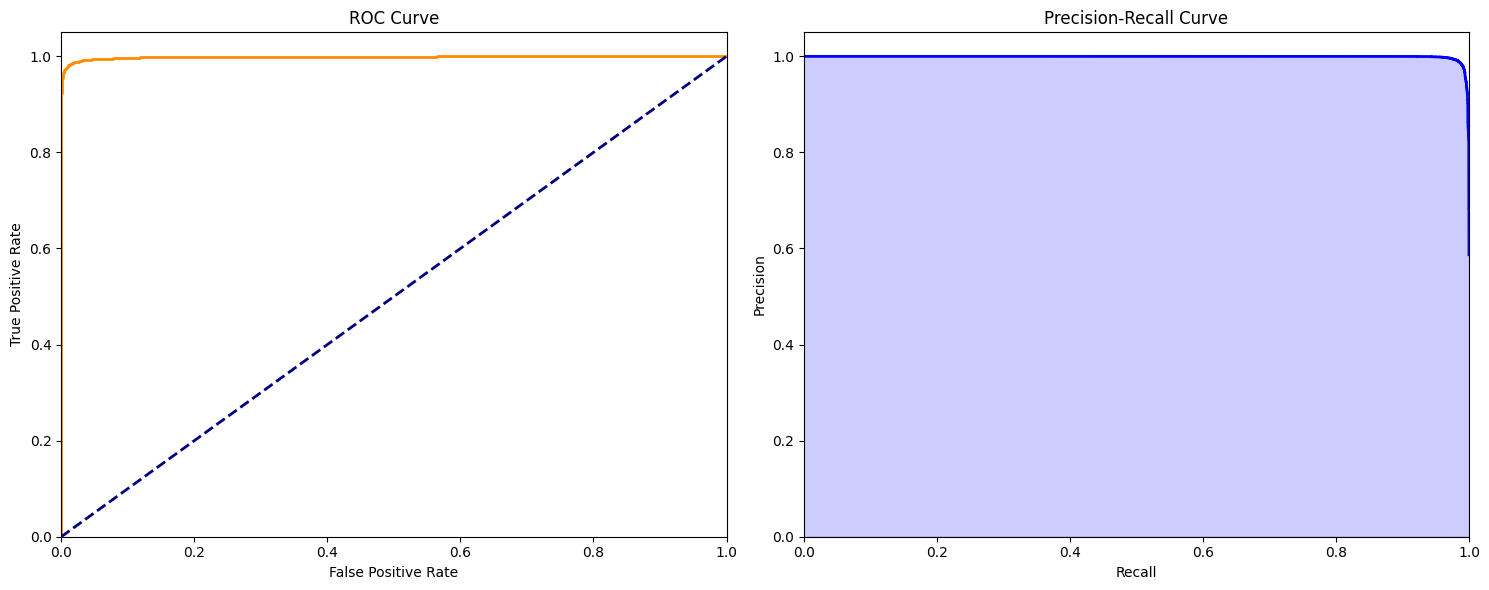

In [ ]:
fpr, tpr, _ = roc_curve(y_test, proba_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, proba_scores)
auc_precision_recall = auc(recall, precision)

plt.figure(figsize=(15, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [ ]:
# If not installed
! pip install wordcloud

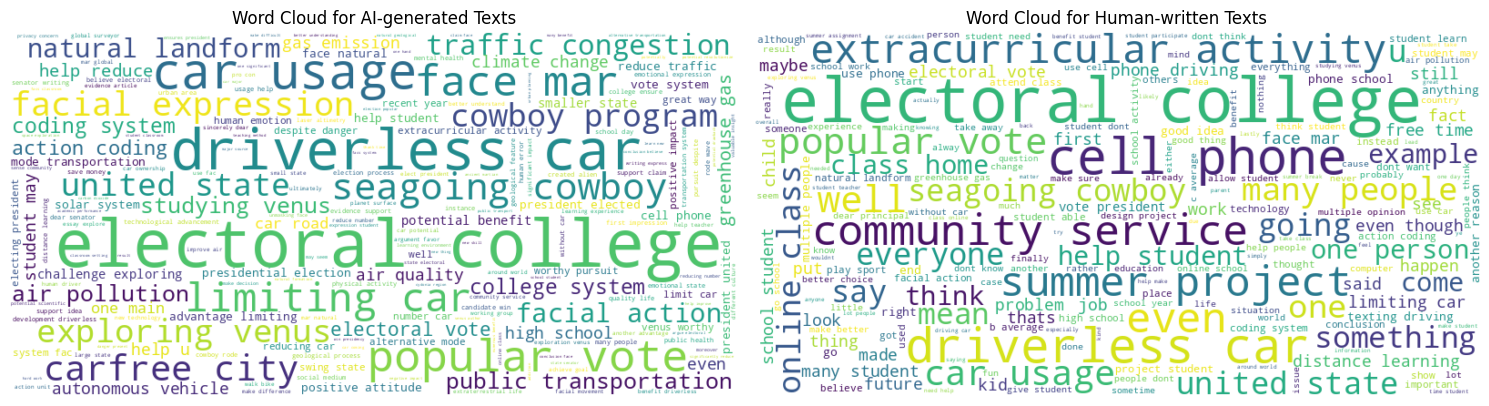

In [ ]:
ai_texts = " ".join(text for text, label in zip(X, y) if label == 1)
human_texts = " ".join(text for text, label in zip(X, y) if label == 0)

# Create word clouds
wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate(ai_texts)
wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate(human_texts)

# For AI-generated texts
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.title('Word Cloud for AI-generated Texts')
plt.axis('off')

# For Human-written texts
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.title('Word Cloud for Human-written Texts')
plt.axis('off')

plt.tight_layout()
plt.show()